In [13]:
import tensorflow as tf
import keras_preprocessing
print(tf.__version__)
print(keras_preprocessing.__version__)

2.9.3
1.1.2


In [2]:
import tensorflow as tf

# Verificar se a GPU está disponível
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Criar um tensor simples
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)

print(c)


Num GPUs Available:  1
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [33]:

import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing.image import load_img
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
tf.config.run_functions_eagerly(True)
df = pd.read_csv("train.csv", index_col=0)
print(df.shape)
df.head()


train_set, valid_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set.shape)
print(valid_set.shape)
SOURCE = 'images/train'
VALID_DIR = 'temp/valid/'
TRAIN_DIR = 'temp/train/'

(1821, 4)
(1456, 4)
(365, 4)


In [4]:

import os
import shutil

# Mudar o diretório de trabalho
os.chdir('e:/gitHub2/IA-deeplearning/plant-pathology')

# Deletar o diretório temporário, se existir
if os.path.exists('temp'):
    shutil.rmtree('temp')

# Criar o diretório temporário
os.mkdir('temp')

# Criar subdiretórios para treinamento
os.mkdir('temp/train')
os.mkdir('temp/train/healthy')
os.mkdir('temp/train/multiple_diseases')
os.mkdir('temp/train/rust')
os.mkdir('temp/train/scab')

# Criar subdiretórios para validação
os.mkdir('temp/valid')
os.mkdir('temp/valid/healthy')
os.mkdir('temp/valid/multiple_diseases')
os.mkdir('temp/valid/rust')
os.mkdir('temp/valid/scab')

In [5]:
# copy images to train directory
from shutil import copyfile

# copy images to valid directory
for index, data in valid_set.iterrows():
    label = df.columns[np.argmax(data)]
    filepath = os.path.join(SOURCE, index + ".jpg")
    destination = os.path.join(VALID_DIR, label, index + ".jpg")
    copyfile(filepath, destination)
    
for subdir in os.listdir(VALID_DIR):
    print(subdir, len(os.listdir(os.path.join(VALID_DIR, subdir))))


# copy images to train directory
for index, data in train_set.iterrows():
    label = df.columns[np.argmax(data)]
    filepath = os.path.join(SOURCE, index + ".jpg")
    destination = os.path.join(TRAIN_DIR, label, index + ".jpg")
    copyfile(filepath, destination)
    
for subdir in os.listdir(TRAIN_DIR):
    print(subdir, len(os.listdir(os.path.join(TRAIN_DIR, subdir))))

healthy_dir = os.path.join(TRAIN_DIR, 'healthy')
mdiseases_dir = os.path.join(TRAIN_DIR, 'multiple_diseases')
scab_dir = os.path.join(TRAIN_DIR, 'scab')
rust_dir = os.path.join(TRAIN_DIR, 'rust')

healthy_files = os.listdir(healthy_dir)
mdiseases_files = os.listdir(mdiseases_dir)
scab_files = os.listdir(scab_dir)
rust_files = os.listdir(rust_dir) 


healthy 100
multiple_diseases 18
rust 120
scab 127
healthy 416
multiple_diseases 73
rust 502
scab 465


In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SOURCE = 'images/train'
VALID_DIR = 'temp/valid/'
TRAIN_DIR = 'temp/train/'

training_datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(225, 150), class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(VALID_DIR, target_size=(225, 150), class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(225, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

"""


Found 1456 images belonging to 4 classes.
Found 365 images belonging to 4 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 223, 148, 64)      1792      
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 111, 74, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 109, 72, 64)       36928     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 54, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 52, 34, 128)       73856     
                                    

"\n\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 150, 3)),\n    tf.keras.layers.MaxPooling2D(2, 2),\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(256, (3,3), activation='sigmoid'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(256, (3,3), activation='tanh'),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dense(4, activation='softmax')\n])\n\nmodel.summary()\n\n"

In [51]:

# Compilar o modelo

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], run_eagerly=True)

# Callbacks
#early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cnngpu.keras", save_best_only=True)
checkpoint_loss = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_loss.h5', save_best_only=True, monitor='val_loss', mode='min')
checkpoint_accuracy = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_accuracy.h5', save_best_only=True, monitor='val_accuracy', mode='max')



# Calcular steps_per_epoch e validation_steps
batch_size = 32
steps_per_epoch = len(train_generator) // batch_size
validation_steps = len(validation_generator) // batch_size

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(TRAIN_DIR, VALID_DIR)
# Verificar se os generators têm pelo menos um lote de dados
if train_generator is not None and validation_generator is not None:
    if len(train_generator) > 0 and len(validation_generator) > 0:
        history = model.fit(
            train_generator,
            epochs=250,
            steps_per_epoch=steps_per_epoch,
            validation_data=validation_generator,
            validation_steps=validation_steps,
            callbacks=[checkpoint_cb,checkpoint_accuracy,checkpoint_loss],
            verbose=1
        )
    else:
        print("Error: The generators do not have any data.")
else:
    print("Error: One of the generators is None.")


Num GPUs Available:  1
temp/train/ temp/valid/
Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 1.1978 - accuracy: 0.3438
Epoch 2/250
1/1 [==============================] - 1s 1s/step - loss: 1.9398 - accuracy: 0.1875
Epoch 3/250
1/1 [==============================] - 1s 1s/step - loss: 1.2793 - accuracy: 0.2812
Epoch 4/250
1/1 [==============================] - 1s 1s/step - loss: 1.3228 - accuracy: 0.2500
Epoch 5/250
1/1 [==============================] - 1s 1s/step - loss: 1.2277 - accuracy: 0.2812
Epoch 6/250
1/1 [==============================] - 1s 1s/step - loss: 1.3279 - accuracy: 0.2188
Epoch 7/250
1/1 [==============================] - 1s 1s/step - loss: 1.1825 - accuracy: 0.4375
Epoch 8/250
1/1 [==============================] - 1s 1s/step - loss: 1.0943 - accuracy: 0.4688
Epoch 9/250
1/1 [==============================] - 1s 1s/step - loss: 1.1258 - accuracy: 0.3438
Epoch 10/250
1/1 [==============================] - 1s 1s/step - loss: 1.3629 - accuracy:

KeyboardInterrupt: 

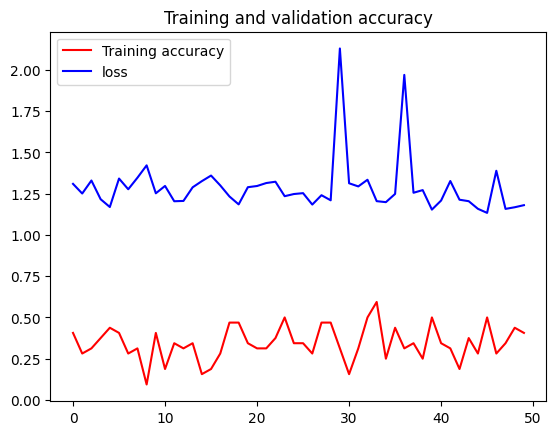

In [54]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [11]:

# Função para testar diferentes batch sizes

def test_batch_size(batch_size):
  
    try:
        model.fit(
            train_generator,
            epochs=1,
            steps_per_epoch=len(train_generator) // batch_size,
            validation_data=validation_generator,
            validation_steps=len(validation_generator) // batch_size,
            batch_size=batch_size
        )
        print(f"Batch size {batch_size} funciona!")
    except tf.errors.ResourceExhaustedError:
        print(f"Batch size {batch_size} é muito grande para a memória da GPU.")

# Testar diferentes batch sizes
for batch_size in [ 256, 512, 1024]:
    test_batch_size(batch_size)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [12]:
import PIL
print(PIL.__version__)


ModuleNotFoundError: No module named 'PIL'

In [9]:
! conda list

# packages in environment at C:\Users\berna\anaconda3\envs\tf2:
#
# Name                    Version                   Build  Channel
absl-py                   2.1.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
blas                      1.0                         mkl  
bottleneck                1.3.7            py39h9128911_0  
ca-certificates           2024.7.4             h56e8100_0    conda-forge
cachetools                5.5.0                    pypi_0    pypi
certifi                   2024.7.4                 pypi_0    pypi
charset-normalizer        3.3.2                    pypi_0    pypi
colorama                  0.4.6                    pypi_0    pypi
comm                      0.2.2                    pypi_0    pypi
cudatoolkit               11.2.2              h7d7167e_13    conda-forge
cudnn                     8.1.0.77             h3e0f4f4_0    conda-forge
